In [1]:
from model import create_dpnet
model = create_dpnet(in_channel=3)

==> Loading pretrained model model/pretrained_models/hrnetv2_w48_imagenet_pretrained.pth


In [3]:
import torch
x = torch.rand((5,3,256,256))
outputs = model(x)

In [4]:
outputs[0]

tensor([[0.1140, 0.1159],
        [0.1200, 0.1185],
        [0.1259, 0.1258],
        [0.1244, 0.1251],
        [0.1319, 0.1330]], grad_fn=<MmBackward>)

In [5]:
from torchvision import transforms
from model import dataloader
import pandas as pd
import os

train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
test_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

data_dir = '/meladyfs/newyork/loctrinh/DATASETS/'
frame_count = {'FF++': pd.read_csv(os.path.join(data_dir, 'FF++', 'video_stat.csv'), index_col=0)}
train_df = pd.read_csv(os.path.join(data_dir, 'FF++/splits/{}_trainlist_01.csv'.format('Deepfakes')))
val_df = pd.read_csv(os.path.join(data_dir, 'FF++/splits/{}_vallist_01.csv'.format('Deepfakes')))
test_df = pd.read_csv(os.path.join(data_dir, 'FF++/splits/{}_testlist_01.csv'.format('Deepfakes')))

data_loader = dataloader.SingleImageLoader(10, 4, data_dir, frame_count, train_df, val_df, test_df, train_transform, test_transform)
train_loader, val_loader, test_loader, push_loader = data_loader.run()

==> Training data: 388800 frames
==> Validation data: 28000 frames
==> Testing data: 28000 frames
==> Pushing data: 144000 frames


In [6]:
%%timeit
imgs, labels = next(iter(train_loader))

983 ms ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
from utils import *

In [8]:
unform = UnNormalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

tensor(1)


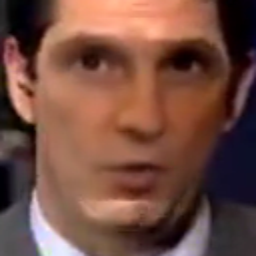

In [15]:
from PIL import Image
idx = 5
print(labels[idx])
display(Image.fromarray(tensor2uint8(unform(imgs[idx]))))